## Importing the libraries

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
## Importing the image
car_img=cv2.imread('car_plate.jpg')

In [11]:
type(car_img)

numpy.ndarray

In [12]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

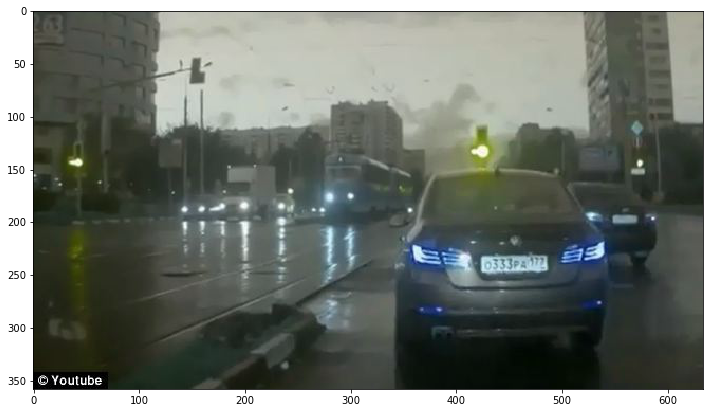

In [13]:
display(car_img)

In [14]:
#Loading the haar cascade file
lic_cascade=cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [50]:
#Function for detecting the plate and blurring it
def detect_lic_plate(img):
    img_copy=car_img.copy()
    lic_detects=lic_cascade.detectMultiScale(img_copy)
    
    for x,y,w,h in lic_detects:
            cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),3)
            plate_img=img_copy[y:y+h,x:x+w]
            plate_img=cv2.medianBlur(plate_img,(5))
            img_copy[y:y+h,x:x+w]=plate_img
         
            break
    
    return(img_copy)

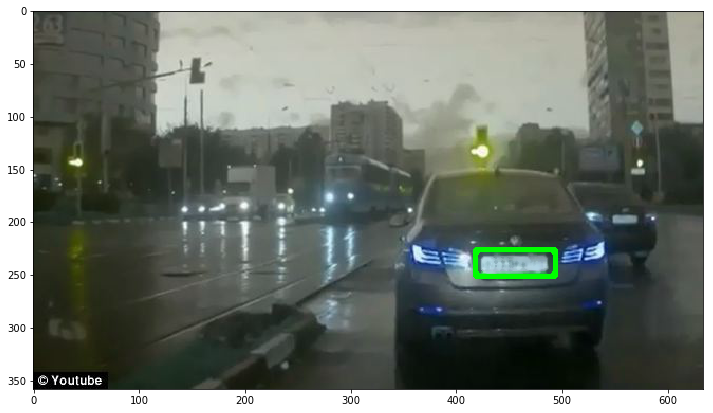

In [51]:
detected_img=detect_lic_plate(car_img)
display(detected_img)